# Machine Learning Model Building

In [2]:
# Load libraries
import pandas
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

### Documentation Links and Explanations

1. [**Pandas**](https://pandas.pydata.org/pandas-docs/stable/)  
   Pandas is a powerful data manipulation and analysis library, particularly useful for handling structured data.
   

2. [**read_csv (Pandas)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)  
   The `read_csv` function reads CSV (Comma-Separated Values) files into a DataFrame.  
   

3. [**scatter_matrix (Pandas)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html)  
   `scatter_matrix` creates a matrix of scatter plots for visualizing relationships between variables.
   

4. [**Matplotlib**](https://matplotlib.org/stable/contents.html)  
   Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. 
   

5. [**train_test_split (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  
   The `train_test_split` function splits datasets into training and testing sets.
   
   

6. [**cross_val_score (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)  
   `cross_val_score` evaluates a model's performance using cross-validation.  
   

7. [**StratifiedKFold (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)  
   `StratifiedKFold` provides stratified splitting of data into training and test sets for cross-validation. 
   

8. [**classification_report (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
   `classification_report` generates a text report showing the main classification metrics.
   

9. [**confusion_matrix (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
   `confusion_matrix` is used to evaluate the accuracy of a classification by computing a confusion matrix.
   

10. [**accuracy_score (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)  
    `accuracy_score` calculates the accuracy of a classification model.
    

11.[ **LogisticRegression (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
    `LogisticRegression` models the relationship between a dependent variable and one or more independent variables using logistic regression.  
    

12. [**DecisionTreeClassifier (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
    `DecisionTreeClassifier` creates decision trees for classification tasks.
    
    

13. [**KNeighborsClassifier (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)  
    `KNeighborsClassifier` is an implementation of the k-nearest neighbors algorithm for classification.
    

14. [**LinearDiscriminantAnalysis (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)  
    `LinearDiscriminantAnalysis` is used for classification tasks by finding a linear combination of features that separates classes.  
    

15. [**GaussianNB (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)  
    `GaussianNB` implements the Gaussian Naive Bayes algorithm for classification tasks.  
    

16. [**SVC (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)  
    `SVC` is an implementation of support vector machines for classification tasks.  
    

17. [**SelectKBest (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) & [**f_classif (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)  
    `SelectKBest` selects the top k features based on statistical tests, and `f_classif` is a function used for ANOVA F-tests.
    

18. [**RandomForestClassifier (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
    `RandomForestClassifier` creates a random forest, an ensemble of decision trees, for classification tasks.
    

19. [**StandardScaler (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) & [**LabelEncoder (Scikit-learn)**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)  
    `StandardScaler` standardizes features, and `LabelEncoder` encodes categorical labels as integers.

### Making a model and testing accuracy (classification)

In [3]:
# Split-out validation dataset
dataset = read_csv("data/labeled_comments.csv")
dataset = dataset.dropna(subset=[dataset.columns[0]]) 
dataset.head()

,Comment,Label
0,they never told me I couldnt sing what in the ...,Neutral
1,THEY DIDNT SAY I COULDNT SIIINGGGGG kat from v...,Neutral
2,Youre very brave for having the comment sectio...,Not Cyberbullying
3,i didnt know what her response would be but i ...,Neutral
4,This is so insulting to the victims,Cyberbullying


In [4]:
dataset["Label"].value_counts()

Not Cyberbullying    9077
Neutral              8394
Cyberbullying        8150
Name: Label, dtype: int64

In [14]:
import warnings
warnings.filterwarnings('ignore')
X = dataset["Comment"].astype(str)
y = dataset["Label"].astype(str)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)


In [14]:
# Make predictions on validation dataset
pipeline = make_pipeline(TfidfVectorizer(), SVC(gamma="auto"))
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.3477073170731707
[[   0    0 1675]
 [   0    0 1668]
 [   0    0 1782]]
                   precision    recall  f1-score   support

    Cyberbullying       0.00      0.00      0.00      1675
          Neutral       0.00      0.00      0.00      1668
Not Cyberbullying       0.35      1.00      0.52      1782

         accuracy                           0.35      5125
        macro avg       0.12      0.33      0.17      5125
     weighted avg       0.12      0.35      0.18      5125



In [9]:
# Spot Check Algorithms
warnings.filterwarnings('ignore')
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
#pipeline = make_pipeline(TfidfVectorizer(),model)
result = []
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(make_pipeline(TfidfVectorizer(),model), X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 result.append([name, cv_results.mean()])
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 pipeline = make_pipeline(TfidfVectorizer(),model)
 pipeline.fit(X_train, Y_train)
 predictions = pipeline.predict(X_validation)
 # Evaluate predictions
 print(accuracy_score(Y_validation, predictions))
 print(confusion_matrix(Y_validation, predictions))
 print(classification_report(Y_validation, predictions))

LR: 0.806011 (0.006152)
0.8111219512195122
[[1237  204  234]
 [ 102 1473   93]
 [ 168  167 1447]]
                   precision    recall  f1-score   support

    Cyberbullying       0.82      0.74      0.78      1675
          Neutral       0.80      0.88      0.84      1668
Not Cyberbullying       0.82      0.81      0.81      1782

         accuracy                           0.81      5125
        macro avg       0.81      0.81      0.81      5125
     weighted avg       0.81      0.81      0.81      5125

KNN: 0.401737 (0.005652)
0.40390243902439027
[[ 216 1445   14]
 [  21 1629   18]
 [  15 1542  225]]
                   precision    recall  f1-score   support

    Cyberbullying       0.86      0.13      0.22      1675
          Neutral       0.35      0.98      0.52      1668
Not Cyberbullying       0.88      0.13      0.22      1782

         accuracy                           0.40      5125
        macro avg       0.70      0.41      0.32      5125
     weighted avg       0.70  

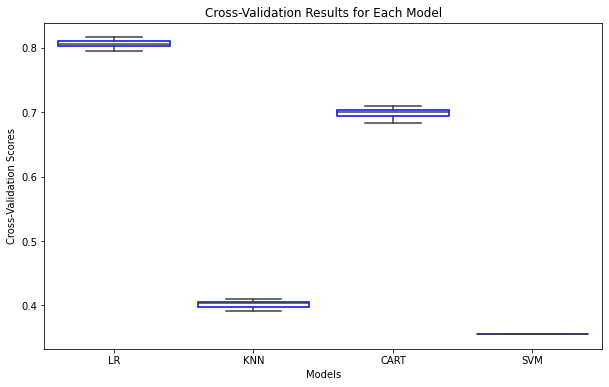

In [10]:
all_scores = [score for scores in results for score in scores]
all_labels = [name for name, scores in zip(names, results) for _ in scores]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_labels, y=all_scores, boxprops=dict(facecolor='none', edgecolor='blue'))

# Customize the plot
plt.title('Cross-Validation Results for Each Model')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Scores')

plt.show()